Tematem projektu jest sprawdzenie w jakim czasie zostanie osiągnięta odporność zbiorowa w przypadku COVID-19 w Europie.

Dane zostały pobrane z https://www.kaggle.com/gpreda/covid-world-vaccination-progress i
przedstawiają dzienne statystyki dotyczące szczepień dla każdego kraju na świecie.

Dane składają się z 14 kolumn, z których wybrane zostały najważniejsze pod względem istotności badanego problemu. Kolumny nie mające związku z tematem projektu tj. typ szczepionki, ilość ludzi zaszczepionych na sto, źródło danych, zostały usunięte.
<p><br>
Badane cechy to m.in: 
    <li>nazwa kraju
    <li>data
    <li>ilość dziennych szczepień
    <li>ilość ludzi zaszczepionych.

<br>Do przeprowadzonych analiz zostały wybrane wyłącznie kraje europejskie.


In [136]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv('./country_vaccinations.csv', delimiter=',')

columnsToDrop = ['iso_code', 'daily_vaccinations_raw', 'source_website', 'source_name',
                 'vaccines', 'people_fully_vaccinated_per_hundred',
                 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']

data = df.drop(columnsToDrop, 1)
data = data[data['daily_vaccinations'].notna()]

#  ---- ADD POPULATION -----
df_population = pd.read_csv("population.csv", delimiter=',', sep=',', header=2, usecols=['Country Name', '2019'])
df_population.loc[df_population['Country Name'] == 'Slovak Republic', 'Country Name'] = 'Slovakia'

for i in range(0,len(df_population)):
    data.loc[data['country'] == df_population.loc[i, 'Country Name'], 'population'] = df_population.loc[i, '2019']

#  ---- EUROPE STATISTICS -----
europe_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland','France','Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden']
europe_data = data[data['country'].isin(europe_countries)]
for i in range(0, len(europe_countries)):
    europe_data.loc[europe_data['country'] == europe_countries[i], 'country'] = i

europe_data = europe_data.sort_values(by=['date'])
europe_data = europe_data.reset_index(drop=True)

import datetime as dt
europe_data['date'] = pd.to_datetime(europe_data['date'])

date_column = europe_data['date'].copy()
country_column = europe_data['country'].copy()

# europe_data = europe_data.fillna(europe_data.mean())
europe_data

/Users/blania/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,daily_vaccinations_per_million,population
0,6,2020-12-18,NaN,NaN,NaN,0.0,0.0,5818553.0
1,6,2020-12-19,2.0,2.0,NaN,0.0,0.0,5818553.0
2,6,2020-12-20,NaN,NaN,NaN,0.0,0.0,5818553.0
3,6,2020-12-21,3.0,3.0,NaN,0.0,0.0,5818553.0
4,6,2020-12-22,4.0,4.0,NaN,1.0,0.0,5818553.0
5,6,2020-12-23,7.0,7.0,NaN,1.0,0.0,5818553.0
6,6,2020-12-24,8.0,8.0,NaN,1.0,0.0,5818553.0
7,6,2020-12-25,NaN,NaN,NaN,1.0,0.0,5818553.0
8,6,2020-12-26,9.0,9.0,NaN,1.0,0.0,5818553.0
9,6,2020-12-27,6308.0,6308.0,NaN,901.0,156.0,5818553.0


In [101]:
europe_data.isna().sum()

country                              0
date                                 0
total_vaccinations                 698
people_vaccinated                  737
people_fully_vaccinated           1001
daily_vaccinations                   0
daily_vaccinations_per_million       0
population                           0
dtype: int64


<b>Dane zostały zgrupowane datami, a następnie zsumowane </b>- tak aby przedstawiały sumę skumulowaną dziennych statystyk z europejskich krajów. Dzięki temu pozbyliśmy się również problemu z danymi brakującymi.
<br>Wiersze zostały posortowane według daty.


In [137]:
europe_data = europe_data.drop(['country'], 1)
europe_data = europe_data.drop(['daily_vaccinations_per_million'], 1)

days = europe_data['date'].unique()
print("Number of days: ", len(days))

europe_data = europe_data.groupby(['date'], as_index=False).sum()
europe_data = europe_data.set_index('date')

europe_data['total_vaccinations_percentage'] = europe_data['total_vaccinations']/europe_data['population']
europe_data = europe_data.drop(['population'], 1)
europe_data.head(10)

Number of days:  173


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_percentage
date,,,,,
2020-12-18,0.0,0.0,0.0,0.0,0.000000e+00
2020-12-19,2.0,2.0,0.0,0.0,3.437281e-07
2020-12-20,0.0,0.0,0.0,0.0,0.000000e+00
2020-12-21,3.0,3.0,0.0,0.0,5.155921e-07
2020-12-22,4.0,4.0,0.0,1.0,6.874561e-07
2020-12-23,7.0,7.0,0.0,1.0,1.203048e-06
2020-12-24,8.0,8.0,0.0,1.0,1.374912e-06
2020-12-25,0.0,0.0,0.0,1.0,0.000000e+00
2020-12-26,9.0,9.0,0.0,1.0,1.546776e-06


Zauważone dane odstające w kolumnie 'people_fully_vacc', jednak liczba ta nie jest znacząca i nie powinna wpływać na obliczenia.

<AxesSubplot:>

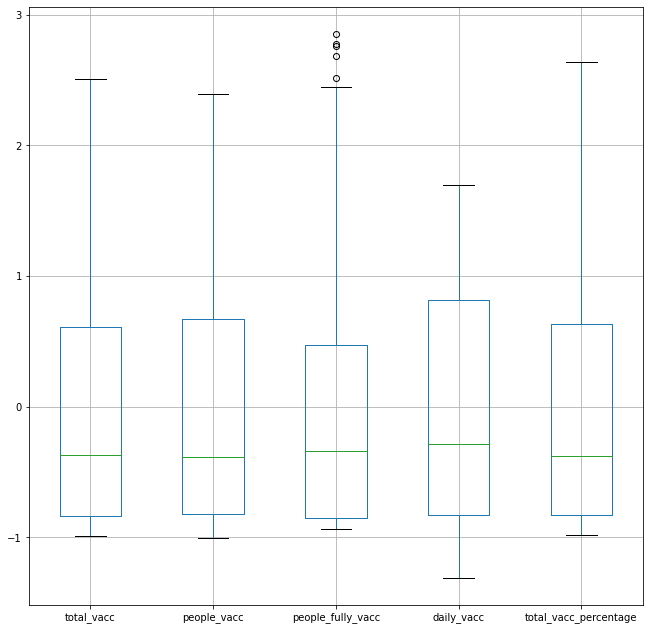

In [138]:
#  ---- STANDARDIZATION ----
europe_data = europe_data.values
X_standard_scaler = europe_data - europe_data.mean(axis=0)
X_standard_scaler = X_standard_scaler / europe_data.std(axis=0)

df_normalized = pd.DataFrame(X_standard_scaler)
df_normalized.columns = ['total_vacc', 'people_vacc','people_fully_vacc',
              'daily_vacc', 'total_vacc_percentage']
df_normalized.boxplot()


In [132]:
# df_normalized.hist()

,0,1,2,3,4
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.282868,0.295804,0.246852,0.435173,0.270794
std,0.286579,0.295285,0.264910,0.333467,0.277521
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043625,0.054702,0.022080,0.159224,0.041055
50%,0.176626,0.181948,0.157382,0.340246,0.166221
75%,0.456806,0.493493,0.371493,0.707143,0.446713
max,1.000000,1.000000,1.000000,1.000000,1.000000


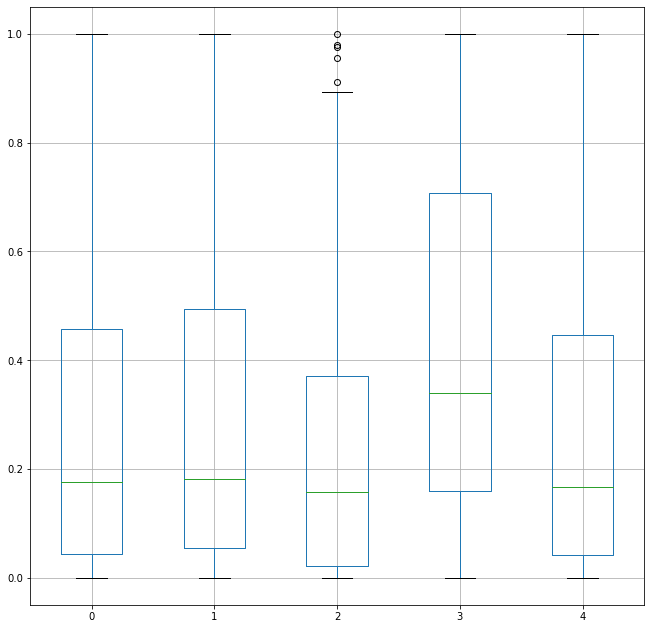

In [139]:
#  ---- STANDARDIZATION - USING SKLEARN ----
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_input_scaled = min_max_scaler.fit_transform(europe_data)
df_new = pd.DataFrame(data_input_scaled)

df_new.boxplot()
df_new.describe()

Selekcja cech z użyciem korelacji Pearsona

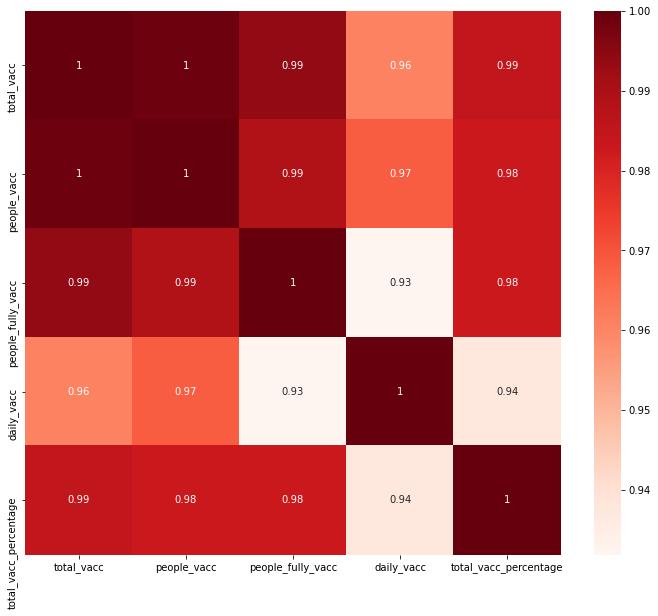

,total_vacc,people_vacc,people_fully_vacc,daily_vacc,population,total_vacc_percentage
0,-0.989916,-1.004665,-0.934538,-1.308781,-3.879586,-0.978593
1,-0.989916,-1.004665,-0.934538,-1.308781,-3.879586,-0.978591
2,-0.989916,-1.004665,-0.934538,-1.308781,-3.879586,-0.978593
3,-0.989916,-1.004665,-0.934538,-1.308781,-3.879586,-0.978590
4,-0.989916,-1.004665,-0.934538,-1.308780,-3.879586,-0.978589


In [140]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
correalation = df_normalized.corr()
sns.heatmap(correalation, annot=True, cmap=plt.cm.Reds)
plt.show()
dr.head()

In [141]:
cor_target = abs(correalation['total_vacc_percentage'])

# najbardziej skorelowane cechy
relevant_features = cor_target[cor_target>0.5]
relevant_features

total_vacc               0.985239
people_vacc              0.983195
people_fully_vacc        0.983143
daily_vacc               0.937579
total_vacc_percentage    1.000000
Name: total_vacc_percentage, dtype: float64

Zastosowanie korelacji Pearsona pozwoliło na wybranie najbardziej skorelowanych cech:
<li>total_vaccinations              
<li>people_vaccinated        
<li>people_fully_vaccinated        
<li>daily_vaccinations         
<li>total_vaccinations_percentage

Ponieżej został przedstawiony podział na zbiór testowy i treningowy z wykorzystaniem 
funkcji train_test_split(). Do zbioru treningowego wybrano skorelowane cechy.
<li>X: total_vaccinations, people_vaccinated,people_fully_vaccinated,daily_vaccinations
<li>y: total_vaccinations_percentage
<br><br>    
Program przewiduje procent zaszczepionej ludności UE z użyciem predykcji wcześniejszych dni.

In [142]:
from sklearn.model_selection import train_test_split

X = dr.values[:,:4]
y = dr.values[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)
x_ax = range(len(y_test))

<p>Zbiory na początku zostały wykorzystane na dwóch regresorach:
<li>XGBRegressor (XGBoost for Regression)
<li>SVR (Support Vector Regression)
<p>
    <br>Do sprawdzenia <b>miary regresorów</b> zostały wykorzystane:
<li>Mean Square Error
<li>R2 Score

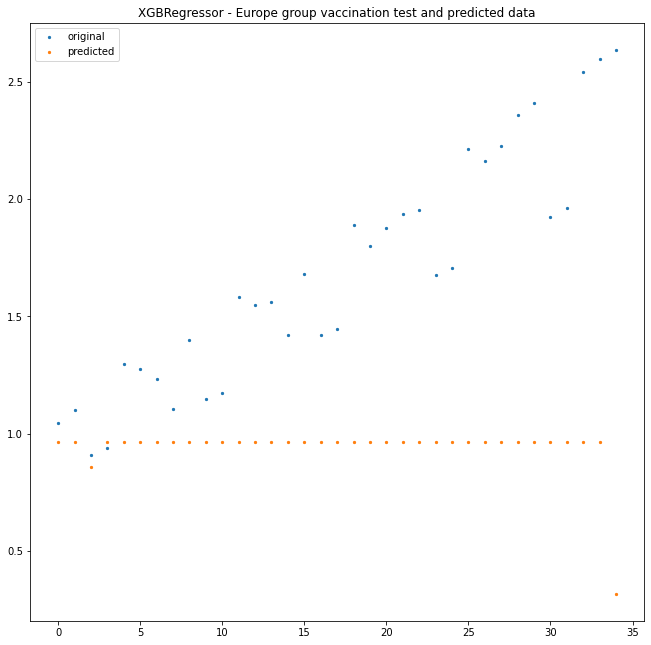

In [143]:
from xgboost import XGBRegressor

xgb_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

plt.scatter(x_ax, y_test, s=5, label="original")
plt.scatter(x_ax, y_pred_xgb, s=5, label="predicted")
plt.title("XGBRegressor - Europe group vaccination test and predicted data")
plt.legend()
plt.show()

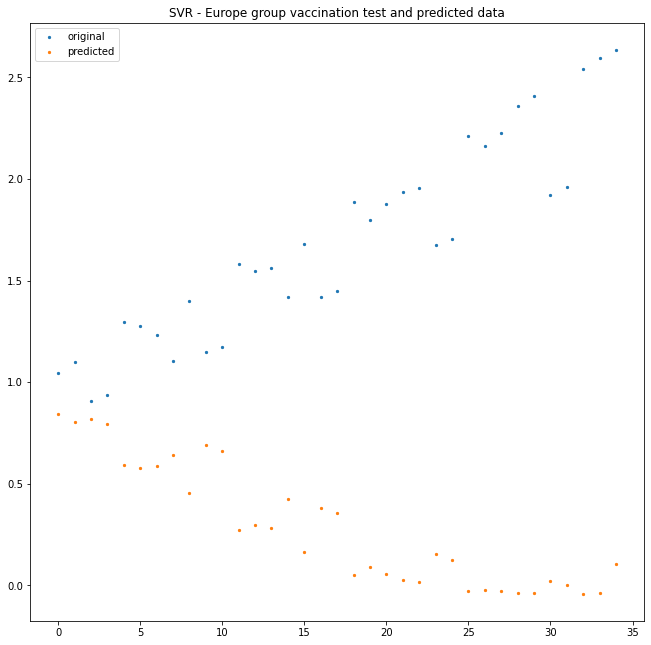

In [144]:
from sklearn.svm import SVR

svr_clf = SVR()
svr_clf.fit(X_train, y_train.ravel())
y_pred_svr = svr_clf.predict(X_test)

plt.scatter(x_ax, y_test, s=5, label="original")
plt.scatter(x_ax, y_pred_svr, s=5, label="predicted")
plt.title("SVR - Europe group vaccination test and predicted data")
plt.legend()
plt.show()

Wyniki dla wcześniejszych metod regresji nie są zadowalające

In [145]:
from sklearn.metrics import mean_squared_error

def get_squared_error_score(x, y):
    y_prediction = np.reshape(y, (y.shape[0], -1))
    return mean_squared_error(x, y)

def get_r2_score(x, y):
    y_prediction = np.reshape(y, (y.shape[0], -1))
    zx = (x-np.mean(x))/np.std(x, ddof=1)
    zy = (y_prediction-np.mean(y_prediction))/np.std(y_prediction, ddof=1)
    r = np.sum(zx*zy)/(len(x)-1)
    return r**2

r2_score_xgb = get_r2_score(y_test, y_pred_xgb)
r2_score_svr = get_r2_score(y_test, y_pred_svr)

print(f'XGBRegressor score: {r2_score_xgb}')
print(f'SVR score: {r2_score_svr}')


XGBRegressor score: 0.08146235059588772
SVR score: 0.838264506763865


<b>Walidacja krzyżowa</b>
<p>
Ponieważ stosujemy szeregi czasowe, przewidywanie przeszłości za pomocą danych z przyszłości (bądź danych losowych zestawów) wydaje się być bez sensu. Z tego powodu stosujemy dzielenie danych na podzbiory w sposób przedstawiony na ilustracji poniżej:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
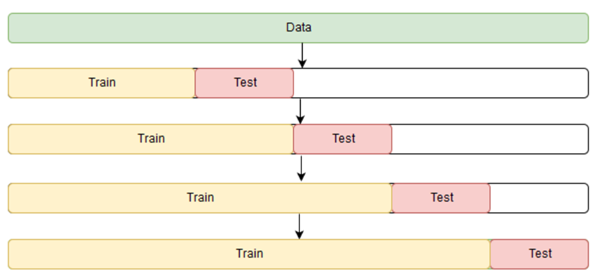

In [146]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

time_series_split = TimeSeriesSplit(max_train_size=None, n_splits=10)
i = 0
for train_index, test_index in time_series_split.split(X):
    i += 1
    X_train_cross_validation, X_test_cross_validation = X[train_index], X[test_index]
    y_train_cross_validation, y_test_cross_validation = y[train_index], y[test_index]
    print(f'Iteration: {i}   Train interval: {train_index[0]}-{train_index[-1]}   Test interval: {test_index[0]}-{test_index[-1]}')


Iteration: 1   Train interval: 0-22   Test interval: 23-37
Iteration: 2   Train interval: 0-37   Test interval: 38-52
Iteration: 3   Train interval: 0-52   Test interval: 53-67
Iteration: 4   Train interval: 0-67   Test interval: 68-82
Iteration: 5   Train interval: 0-82   Test interval: 83-97
Iteration: 6   Train interval: 0-97   Test interval: 98-112
Iteration: 7   Train interval: 0-112   Test interval: 113-127
Iteration: 8   Train interval: 0-127   Test interval: 128-142
Iteration: 9   Train interval: 0-142   Test interval: 143-157
Iteration: 10   Train interval: 0-157   Test interval: 158-172


Walidację krzyżową zastosowano na regresorach:
- SVR
- XGBRegressor
- MLP
- DecisionTreeRegressor
- KNeighboursRegressor


In [147]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn import tree
from sklearn import neighbors
from statistics import mean
from IPython.display import HTML, display
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

def svr_regression_prediction(X_train, y_train, X_test):
    svr_clf = SVR()
    svr_clf = GridSearchCV(svr_clf, svr_parameters, scoring='r2',  n_jobs=-1)
    svr_clf.fit(X_train, y_train.ravel())
    y_pred_svr = svr_clf.predict(X_test)
    return y_pred_svr
    
def xgb_regression_prediction(X_train, y_train, X_test):
    xgb_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100, n_jobs=-1)
    xgb_clf = RandomizedSearchCV(xgb_clf, xgb_parameters, scoring='r2',  n_jobs=-1)
    xgb_clf.fit(X_train, y_train.ravel())
    y_pred_xgb = xgb_clf.predict(X_test)
    return y_pred_xgb

def mlp_regression_prediction(X_train, y_train, X_test):
    mlp_clf = MLPRegressor()
    mlp_clf = GridSearchCV(mlp_clf, mlp_parameters, scoring='r2',  n_jobs=-1)
    mlp_clf.fit(X_train, y_train.ravel())
    y_pred_mlp = mlp_clf.predict(X_test)
    return y_pred_mlp

def tree_regression_prediction(X_train, y_train, X_test):
    tree_clf = tree.DecisionTreeRegressor()
    tree_clf = GridSearchCV(tree_clf, tree_parameters, scoring='r2',  n_jobs=-1)
    tree_clf.fit(X_train, y_train.ravel())
    y_pred_tree = tree_clf.predict(X_test)
    return y_pred_tree

def k_neighbors_regression_prediction(X_train, y_train, X_test):
    k_neighbors_clf = neighbors.KNeighborsRegressor(n_jobs=-1)
    k_neighbors_clf.fit(X_train, y_train.ravel())
    y_pred_k_neighbors = k_neighbors_clf.predict(X_test)
    return y_pred_k_neighbors

def voting_regression_prediction(X_train, y_train, X_test, clf_1, clf_2, clf_3):
    voting_clf = VotingRegressor([('clf1', clf_1), ('clf2', clf_2), ('clf3', clf_3)], n_jobs=-1)
    voting_clf.fit(X_train, y_train.ravel())
    y_pred_voting = voting_clf.predict(X_test)
    return y_pred_voting

def stacking_regression_prediction(X_train, y_train, X_test, clf_1, clf_2, clf_3):
    stacking_clf = StackingRegressor([('clf1', clf_1), ('clf2', clf_2), ('clf3', clf_3)], n_jobs=-1)
    stacking_clf.fit(X_train, y_train.ravel())
    y_pred_stacking = stacking_clf.predict(X_test)
    return y_pred_stacking


svr_parameters = {'kernel':['poly', 'sigmoid', 'rbf'], 'C':[1, 0.1, 10],
                 'gamma':['scale', 'auto'], 'coef0': [0.0, 0.1]}
mlp_parameters = {'alpha': [0.01, 0.0001, 0.001], 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate': ['constant', 'invscaling', 'adaptive']}
tree_parameters = {'splitter': ['best', 'random'], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                  }
xgb_parameters = {'max_depth': [6, 10, 3], 'min_child_weight': [1], 'eta': [0.3, 0.1, 0.05],
                  'subsample': [1, 0.5], 'colsample_bytree': [1, 0.9, 0.7], 
                  'objective':['reg:linear', 'reg:squarederror', 'multi:softprob', 'binary:logistic'], 
                 }

svr_r2_scores = []
xgb_r2_scores = []
mlp_r2_scores = []
tree_r2_scores = []
k_neighbours_r2_scores = []
svr_squared_scores = []
xgb_squared_scores = []
mlp_squared_scores = []
tree_squared_scores = []
k_neighbours_squared_scores = []
voting_r2_scores = []
voting_squared_scores = []
stacking_r2_scores = []
stacking_squared_scores = []
i = 0
for train_index, test_index in time_series_split.split(X):
    i += 1
    X_train_cross_validation, X_test_cross_validation = X[train_index], X[test_index]
    y_train_cross_validation, y_test_cross_validation = y[train_index], y[test_index]
    
    prediction_svr = svr_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_svr = get_r2_score(y_test_cross_validation, prediction_svr)
    squared_score_svr = get_squared_error_score(y_test_cross_validation, prediction_svr)
    svr_r2_scores.append(r2_score_svr)
    svr_squared_scores.append(squared_score_svr)
    
    prediction_xgb = xgb_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_xgb = get_r2_score(y_test_cross_validation, prediction_xgb)
    squared_score_xgb = get_squared_error_score(y_test_cross_validation, prediction_xgb)
    xgb_r2_scores.append(r2_score_xgb)
    xgb_squared_scores.append(squared_score_xgb)
    
    prediction_mlp = mlp_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_mlp = get_r2_score(y_test_cross_validation, prediction_mlp)
    squared_score_mlp = get_squared_error_score(y_test_cross_validation, prediction_mlp)
    mlp_r2_scores.append(r2_score_mlp)
    mlp_squared_scores.append(squared_score_mlp)
    
    prediction_tree_regression = tree_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_tree_regression = get_r2_score(y_test_cross_validation, prediction_tree_regression)
    squared_score_tree_regression = get_squared_error_score(y_test_cross_validation, prediction_tree_regression)
    tree_r2_scores.append(r2_score_tree_regression)
    tree_squared_scores.append(squared_score_tree_regression)
    
    prediction_k_neighbours = k_neighbors_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_k_neighbours = get_r2_score(y_test_cross_validation, prediction_k_neighbours)
    squared_score_k_neighbours = get_squared_error_score(y_test_cross_validation, prediction_k_neighbours)
    k_neighbours_r2_scores.append(r2_score_k_neighbours)
    k_neighbours_squared_scores.append(squared_score_k_neighbours)
    
    
    #VOTING CLASSIFIER
    xgb_vote_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
    mlp_vote_clf = MLPRegressor()
    tree_vote_clf = tree.DecisionTreeRegressor()
    prediction_voting = voting_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation, xgb_vote_clf, mlp_vote_clf, tree_vote_clf)
    r2_score_voting = get_r2_score(y_test_cross_validation, prediction_voting)
    squared_score_voting = get_squared_error_score(y_test_cross_validation, prediction_voting)
    voting_r2_scores.append(r2_score_voting)
    voting_squared_scores.append(squared_score_voting)
    
    #STACKING CLASSIFIER
    xgb_stack_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
    mlp_stack_clf = MLPRegressor()
    tree_stack_clf = tree.DecisionTreeRegressor()
    prediction_stacking = stacking_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation, xgb_stack_clf, mlp_stack_clf, tree_stack_clf)
    r2_score_stacking = get_r2_score(y_test_cross_validation, prediction_stacking)
    squared_score_stacking = get_squared_error_score(y_test_cross_validation, prediction_stacking)
    stacking_r2_scores.append(r2_score_stacking)
    stacking_squared_scores.append(squared_score_stacking)
    
    
table_data = [['Regressor model', 'Average r2 score', 'Mean Squared Error score']]
table_data.append(['SVR', mean(svr_r2_scores), mean(svr_squared_scores)])
table_data.append(['XGBRegressor', mean(xgb_r2_scores), mean(xgb_squared_scores)])
table_data.append(['MLP', mean(mlp_r2_scores), mean(mlp_squared_scores)])
table_data.append(['Decision Tree', mean(tree_r2_scores), mean(tree_squared_scores)])
table_data.append(['K-neighbours', mean(k_neighbours_r2_scores), mean(k_neighbours_squared_scores)])
table_data.append(['Voting Regressor', mean(voting_r2_scores), mean(voting_squared_scores)])
table_data.append(['Stacking Regressor', mean(stacking_r2_scores), mean(stacking_squared_scores)])

display_table(table_data)


<ipython-input-145-5eb1045949ff>:10: RuntimeWarning: invalid value encountered in true_divide
  zy = (y_prediction-np.mean(y_prediction))/np.std(y_prediction, ddof=1)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-8.19357252e+04             nan -8.19356699e+04 -1.63981733e+04
 -2.31719754e+07 -1.68090031e+04 -4.05732918e+07             nan
 -2.49205569e+04 -7.83088411e+04]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-3.08579553 -3.65755181 -2.8680528  -1.95938936 -4.64780232 -3.09656739
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [   -53436.85269446                nan                nan
                nan   

[22:17:24] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.59530721 -3.71441989 -3.51078419 -3.12738985 -2.78631215 -3.2067581
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan -1.9778527  -1.26803793 -2.00677852         nan
         nan         nan         nan         nan]
  warnings.warn(


[22:17:29] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.85338286 -1.29904551 -1.54345521 -1.41696355 -1.10230847 -1.12222156
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [         nan  -1.67088529 -32.10710523          nan          nan
  -1.49086185          nan  -2.86813325          nan  -1.45842578]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.19726689 -1.78084377 -1.26163729 -1.2645833  -1.20195644 -1.3505072
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ -2.300396

[22:17:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-3.29055036 -4.01054092 -3.59251953 -3.33053985 -3.37442255 -4.02393921
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.43355572         nan         nan         nan -1.57863024         nan
 -1.5304815  -1.34328182 -1.44073477 -2.14545171]
  warnings.warn(


[22:17:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.65210448 -1.7139541  -1.59787599 -1.85614798 -1.60285137 -1.71256003
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.30964569         nan         nan -2.42192241         nan         nan
 -2.40406812         nan -5.60227571 -2.5350613 ]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.45390021 -2.79711496 -2.34633962 -2.62897872 -2.49483542 -2.54749392
         nan         nan]
  warnings.warn(
<ipython-input-145-5eb1045949ff>:10: RuntimeWarning: invalid value encountered in true_divide
  zy = (y_prediction-np.mean(y_prediction))/np.std(y_prediction, ddof=1)
/User

[22:18:24] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.45461693 -1.54094623 -1.4331048  -2.05935296 -1.52812443 -1.674153
         nan         nan]
  warnings.warn(


Przyglądając się powyższym wynikom można stwierdzić, że najskuteczniejszym algorytmem pod względem obydwóch metod skuteczności jest MLP oraz SVR. Z tego powodu wzięto je pod uwagę do dalszych prób optymalizacji parametrów. 

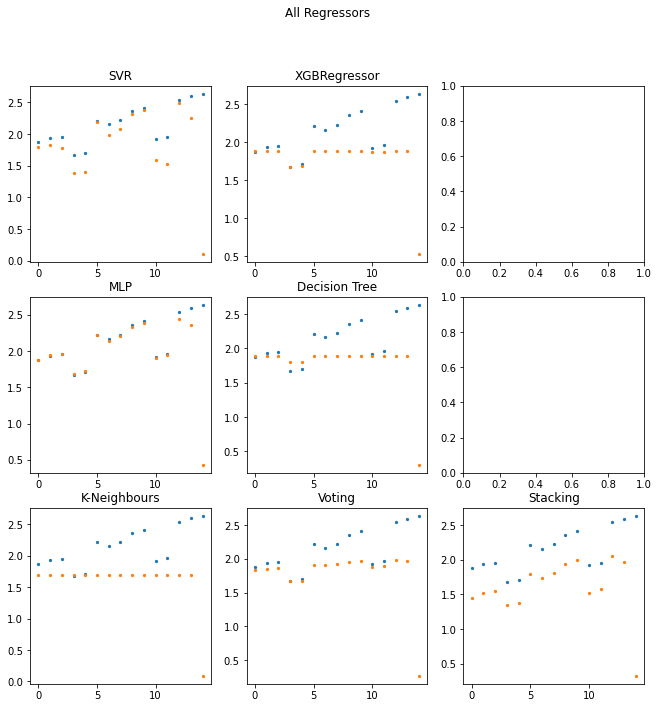

In [148]:
x_ax = range(len(y_test_cross_validation))    
mtl.rcParams['figure.figsize'] = (11,11)
fig, axs = plt.subplots(3, 3)
fig.suptitle('All Regressors')
axs[0, 0].set_title('SVR')
axs[0, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[0, 0].scatter(x_ax, prediction_svr, s=5)
axs[0, 1].set_title('XGBRegressor')
axs[0, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[0, 1].scatter(x_ax, prediction_xgb, s=5)
axs[1, 0].set_title('MLP')
axs[1, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[1, 0].scatter(x_ax, prediction_mlp, s=5)
axs[1, 1].set_title('Decision Tree')
axs[1, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[1, 1].scatter(x_ax, prediction_tree_regression, s=5)
axs[2, 0].set_title('K-Neighbours')
axs[2, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 0].scatter(x_ax, prediction_k_neighbours, s=5)
axs[2, 1].set_title('Voting')
axs[2, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 1].scatter(x_ax, prediction_voting, s=5)
axs[2, 2].set_title('Stacking')
axs[2, 2].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 2].scatter(x_ax, prediction_stacking, s=5)

Spośród najskuteczniejszych modeli wybrano SVR oraz MLP
<p>Zastosowane metody optymalizacji parametrów:
<li>Grid Search
<li>Random Search
<li>Particle Swarm Optimization (algorytm roju)
 

In [149]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def run_grid_search(model, parameters, X_train, y_train):
    grid_search = GridSearchCV(model, parameters, scoring='r2',  n_jobs=-1)
    result = grid_search.fit(X_train, y_train.ravel())
    table_opt.append([model, 'Grid Search', result.best_score_, result.best_params_])

    
def run_randomized_search(model, parameters, X_train, y_train):
    grid_search = RandomizedSearchCV(model, parameters, scoring='r2',  n_jobs=-1)
    result = grid_search.fit(X_train, y_train.ravel())
    table_opt.append([model, 'Random Search', result.best_score_, result.best_params_])

    
svr_parameters = {'kernel':['poly', 'sigmoid', 'rbf'], 'C':[1, 0.1, 10],
                 'gamma':['scale', 'auto'], 'coef0': [0.0, 0.1]}
mlp_parameters = {'alpha': [0.01, 0.0001, 0.001], 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate': ['constant', 'invscaling', 'adaptive']}
tree_parameters = {'random_state': [0, 1, 10],'splitter': ['best', 'random'], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],}
xgb_parameters = {'max_depth': [6, 10, 3], 'min_child_weight': [1], 'eta': [0.3, 0.1, 0.05],
                  'subsample': [1, 0.5], 'colsample_bytree': [1, 0.9, 0.7], 
                  'objective':['reg:linear', 'reg:squarederror', 'multi:softprob', 'binary:logistic'], }


table_opt = [['Regressor', 'Optimalization method', 'Best score', 'Best Hyperparameters']]

svr_model = svm.SVR()
mlp_model = MLPRegressor()
tree_model = tree.DecisionTreeRegressor()
xgb_model = XGBRegressor()

run_grid_search(svr_model, svr_parameters, X_train, y_train)
run_grid_search(mlp_model, mlp_parameters, X_train, y_train)
run_grid_search(tree_model, tree_parameters, X_train, y_train)
# run_grid_search(xgb_model, xgb_parameters, X_train, y_train)

run_randomized_search(svr_model, svr_parameters, X_train, y_train)
run_randomized_search(mlp_model, mlp_parameters, X_train, y_train)
run_randomized_search(tree_model, tree_parameters, X_train, y_train)

display_table(table_opt)

/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.45961657 -1.8950893  -1.54964957 -2.87333805 -1.45553502 -2.48299543
 -1.51676235 -1.89679657 -1.45589705 -3.44498451 -1.48426733 -2.48299543
 -1.51065479 -1.8950893  -1.51540899 -3.48260847 -1.46495085 -2.41105067
         nan         nan         nan         nan         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.51676235 -1.51540899         nan -1.8950893          nan         nan
 -2.87333805 -1.45589705 -3.48260847 -1.45961657]
  warnings.warn(


Niektóre z optymalizowanych regresorów przyjęły wynik ujemny. Oznacza to, że skuteczność algorytmu jest gorsza niż przed próbą optymalizacji. Możliwym jest, że podane gotowe propozycje wartości parametrów, które były wprowadzane do grid search oraz random search, były zbyt odległe od optymalnych.
<p>Obserwując wyniki, ciekawym jest efekt zastosowania PSO, który faktycznie zoptymalizował parametry. Jednak wartym zwrócenia uwagi jest czas w jakim algorytm się wykonuje - ustawienia roju są na 10 generacji oraz 30 osobników jest bardzo czasochłonne, w szczególności dla MLP, które jest bardziej złożone.

Nie udało się zoptymalizować model SVR (możliwa zbyt mała liczba możliwych rozwiązań)
<p>Udało się zoptymalizować model MLP o blisko 2% (r2 score= 99.1%)
 

Particle Swarm Optimization - zastosowane z użyciem biblioteki Optunity
<li>Liczba cząstek - 30
<li>Liczba iteracji - 10
<p>Ze względu na ograniczoną dokumentację biblioteki, optymalizacji uległy
jedynie parametry z wartościami liczbowymi
<p>PSO okazało się bardzo skuteczne, jednak czasochłonne i obciążające procesor
<li>MLP - r2 score - ~99.1%
<li>SVR - r2 score - ~92.3%
 

In [159]:
import optunity
import sklearn
svr_solver = optunity.make_solver(solver_name='particle swarm', num_particles=30, num_generations=10, C=[0.001, 100], degree=[2, 5], coef0=[0, 1])

def optimize_pso_svr(x_train, y_train, x_test, y_test):
    @optunity.cross_validated(x=x_train, y=y_train, num_iter=2, num_folds=5, aggregator=max)
    def tune_cv(x_train, y_train, x_test, y_test, C, degree, coef0):
        model = sklearn.svm.SVR(C=C, degree=degree, coef0=coef0, kernel='rbf').fit(x_train, y_train.ravel())
        predictions = model.predict(x_test)
        return get_r2_score(y_test, predictions)

    # optimize parameters
    optimal_pars, _ = optunity.optimize(solver=svr_solver, func=tune_cv, maximize=True)
    print("optimal hyperparameters: " + str(optimal_pars))

    tuned_model = sklearn.svm.SVR(kernel='sigmoid', **optimal_pars).fit(x_train, y_train.ravel())
    predictions = tuned_model.predict(x_test)
    return get_r2_score(y_test, predictions)


mlp_solver = optunity.make_solver(solver_name='particle swarm', num_particles=30, num_generations=10, alpha=[0.005, 0.5])
def optimize_pso_mlp(x_train, y_train, x_test, y_test):

    @optunity.cross_validated(x=x_train, y=y_train, num_iter=2, num_folds=5, aggregator=max)
    def tune_cv(x_train, y_train, x_test, y_test, alpha):
        model = sklearn.neural_network.MLPRegressor(alpha=alpha).fit(x_train, y_train.ravel())
        predictions = model.predict(x_test)
        return get_r2_score(y_test, predictions)

    # optimize parameters
    optimal_pars, _ = optunity.optimize(solver=mlp_solver,func=tune_cv, maximize=True)
    print("optimal hyperparameters: " + str(optimal_pars))

    tuned_model = sklearn.neural_network.MLPRegressor(solver='lbfgs', learning_rate= 'invscaling',**optimal_pars).fit(x_train, y_train.ravel())
    predictions = tuned_model.predict(x_test)
    return get_r2_score(y_test, predictions)

score_svr = optimize_pso_svr(X_train, y_train, X_test, y_test)

score_mlp = optimize_pso_mlp(X_train, y_train, X_test, y_test)

optimal hyperparameters: {'C': 48.58449853515624, 'degree': 4.11376953125, 'coef0': 0.36962890625}
optimal hyperparameters: {'alpha': 0.08493476562499999}


In [167]:
svr_model = sklearn.svm.SVR(C=85.79115771484375, degree=2.90380859375, coef0=0.37255859375, kernel='rbf').fit(X_train, y_train.ravel())
svr_predictions = svr_model.predict(X_test)
svr_pso_score = get_r2_score(y_test, svr_predictions)
print(f'SVR PSO version score: {svr_pso_score}')
mlp_model = sklearn.neural_network.MLPRegressor(alpha=0.08493476562499999, learning_rate='invscaling', solver='lbfgs').fit(X_train, y_train.ravel())
mlp_predictions = mlp_model.predict(X_test)
mlp_pso_score = get_r2_score(y_test, mlp_predictions)
print(f'MLP PSO version score: {mlp_pso_score}')


SVR PSO version score: 0.838264506763865
MLP PSO version score: 0.34081567126454104


Po zastosowaniu parametrów z działania algorytmu PSO - zauważono znaczącą poprawę działania algorytmu SVR, który po optymalizacji wydaje się być najbardziej skutecznym narzędziem do predykcji. 
<br><br>
Po przeprowadzeniu kilku prób, MLP wydaje się mieć bardzo losowe wartości skuteczności (spowodowane jest to metodą działania samego algorytmu) i nie nadaje się do dalszego stosowania, chyba że zastosuje się szerszy zakres wejściowych parametrów dla PSO. 